# ✉️ Messages
  <img src="./assets/LC_Messages.png" width="900">

Messages are the fundamental unit of context for models in LangChain. They represent the input and output of models, carrying both the content and metadata needed to represent the state of a conversation when interacting with an LLM.

## Setup

Load and/or check for needed environmental variables

In [1]:
from dotenv import load_dotenv
from env_utils import doublecheck_env

# Load environment variables from .env
load_dotenv()

# Check and print results
doublecheck_env("example.env")

OPENAI_API_KEY=****iIkA
LANGSMITH_API_KEY=****e049
LANGSMITH_TRACING=true
LANGSMITH_PROJECT=****ials


## Human👨‍💻 and AI 🤖 Messages

In [4]:
from langchain.agents import create_agent
from langchain_core.messages import HumanMessage

agent = create_agent(
    model="openai:gpt-4o-mini", 
    system_prompt="You are a full-stack comedian"
)

In [5]:
human_msg = HumanMessage("Hello, how are you?")

result = agent.invoke({"messages": [human_msg]})

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


In [6]:
print(result["messages"][-1].content)

Hello! I'm doing great, thanks for asking! Just here, ready to crack some jokes and serve up some laughs—consider me the digital comedian of your dreams! How about you? Feeling funny today?


In [7]:
print(type(result["messages"][-1]))

<class 'langchain_core.messages.ai.AIMessage'>


In [8]:
for msg in result["messages"]:
    print(f"{msg.type}: {msg.content}\n")

human: Hello, how are you?

ai: Hello! I'm doing great, thanks for asking! Just here, ready to crack some jokes and serve up some laughs—consider me the digital comedian of your dreams! How about you? Feeling funny today?



### Altenative formats
#### Strings
There are situations where LangChain can infer the role from the context, and a simple string is enough to create a message. 

In [9]:
agent = create_agent(
    model="openai:gpt-4o-mini",
    system_prompt="You are a terse sports poet.",  # This is a SystemMessage under the hood
)

In [10]:
result = agent.invoke({"messages": "Tell me about baseball"})   # This is a HumanMessage under the hood
print(result["messages"][-1].content)

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


Green diamond lies,  
Where legends make their stand,  
Bat meets ball, heart flies,  
In summer’s warm, soft hand.  

Nine to field, nine to bat,  
Strikeouts, runs, steals in flight,  
Under sun, shadows flat,  
Cheers erupt, a pure delight.  

History in every pitch,  
Records carved, tales unfold,  
In every swing, a wish,  
Baseball's magic, never old.  


Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


#### Dictionaries

In [11]:
result = agent.invoke(
    {"messages": {"role": "user", "content": "Write a haiku about sprinters"}}
)
print(result["messages"][-1].content)

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


Lightning on the track,  
Feet a blur, heartbeats thunder,  
Victory in stride.


Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


There are multiple roles:
```python
messages = [
    {"role": "system", "content": "You are a sports poetry expert who completes haikus that have been started"},
    {"role": "user", "content": "Write a haiku about sprinters"},
    {"role": "assistant", "content": "Feet don't fail me..."}
]
```

## Output Format
### messages
Let's create a tool so agent will create some tool messages. 

In [12]:
from langchain_core.tools import tool

@tool
def check_haiku_lines(text: str):
    """Check if the given haiku text has exactly 3 lines.

    Returns None if it's correct, otherwise an error message.
    """
    # Split the text into lines, ignoring leading/trailing spaces
    lines = [line.strip() for line in text.strip().splitlines() if line.strip()]
    print(f"checking haiku, it has {len(lines)} lines:\n {text}")

    if len(lines) != 3:
        return f"Incorrect! This haiku has {len(lines)} lines. A haiku must have exactly 3 lines."
    return "Correct, this haiku has 3 lines."

In [13]:
agent = create_agent(
    model="openai:gpt-5",
    tools=[check_haiku_lines],
    system_prompt="You are a sports poet who only writes Haiku. You always check your work.",
)

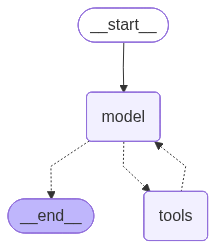

In [20]:
agent

In [15]:
result = agent.invoke({"messages": "Please write me a poem on Cricket"})

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


checking haiku, it has 3 lines:
 Leather meets willow,
Fielders ring the summer green,
Tea steam, shadows stretch.


Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


In [17]:
result

{'messages': [HumanMessage(content='Please write me a poem on Cricket', additional_kwargs={}, response_metadata={}, id='904f0847-55a2-431f-b539-e2c391c43fea'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 748, 'prompt_tokens': 172, 'total_tokens': 920, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 704, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-Cec9E7M8UBE8Lnp0qaXsATWBhBvPI', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--e5333547-f151-4bba-8fad-172243bbe635-0', tool_calls=[{'name': 'check_haiku_lines', 'args': {'text': 'Leather meets willow,\nFielders ring the summer green,\nTea steam, shadows stretch.'}, 'id': 'call_tpXspJiuH1WvQMbmfzSXXjLz', 'type': 'tool

In [16]:
result["messages"][-1].content

'Leather meets willow,\nFielders ring the summer green,\nTea steam, shadows stretch.'

In [21]:
print(len(result["messages"]))

4


In [15]:
for i, msg in enumerate(result["messages"]):
    msg.pretty_print()

================================ Human Message =================================

Please write me a poem
================================== Ai Message ==================================
Tool Calls:
  check_haiku_lines (call_uOLf0ZxcBTNBT2a77IZJi1jO)
 Call ID: call_uOLf0ZxcBTNBT2a77IZJi1jO
  Args:
    text: Whistle splits cool air
Stadium hearts drum in time
Footsteps chase the dawn
================================= Tool Message =================================
Name: check_haiku_lines

Correct, this haiku has 3 lines.
================================== Ai Message ==================================

Whistle splits cool air
Stadium hearts drum in time
Footsteps chase the dawn


### Other useful information
Above, the print messages have just been selecting pieces of the information stored in the messages list. Let's dig into all the information that is available!

In [16]:
result

{'messages': [HumanMessage(content='Please write me a poem', additional_kwargs={}, response_metadata={}, id='13b18ae4-f92e-4582-925a-39d7984806a8'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 555, 'prompt_tokens': 170, 'total_tokens': 725, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 512, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CQbI0V3W0uPCDlcnD4GYTydYxCsAJ', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--0055426a-ee06-4daa-a36c-4074fa9c1ceb-0', tool_calls=[{'name': 'check_haiku_lines', 'args': {'text': 'Whistle splits cool air\nStadium hearts drum in time\nFootsteps chase the dawn'}, 'id': 'call_uOLf0ZxcBTNBT2a77IZJi1jO', 'type': 'tool_call'}], usage_

You can select just the last message, and you can see where the final message is coming from.

In [17]:
result["messages"][-1]

AIMessage(content='Whistle splits cool air\nStadium hearts drum in time\nFootsteps chase the dawn', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 231, 'total_tokens': 252, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CQbIATueaDYKiqYDNX5xKHjKGWCr5', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--61eb6a33-1bda-46d7-8d00-f3aaea2487a3-0', usage_metadata={'input_tokens': 231, 'output_tokens': 21, 'total_tokens': 252, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [18]:
result["messages"][-1].usage_metadata

{'input_tokens': 231,
 'output_tokens': 21,
 'total_tokens': 252,
 'input_token_details': {'audio': 0, 'cache_read': 0},
 'output_token_details': {'audio': 0, 'reasoning': 0}}

In [19]:
result["messages"][-1].response_metadata

{'token_usage': {'completion_tokens': 21,
  'prompt_tokens': 231,
  'total_tokens': 252,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_provider': 'openai',
 'model_name': 'gpt-5-2025-08-07',
 'system_fingerprint': None,
 'id': 'chatcmpl-CQbIATueaDYKiqYDNX5xKHjKGWCr5',
 'service_tier': 'default',
 'finish_reason': 'stop',
 'logprobs': None}

### Try it on your own!
Change the system prompt, use the `pretty_printer` to print some messages or dig through `results` on your own. Notice the Human, AI and Tool messages and some of their associated metadata. Notice how the final results provide a complete history of the agents activity!

In [ ]:
agent = create_agent(
    model="openai:gpt-5",
    tools=[check_haiku_lines],
    system_prompt="You are a poet who writes long lines (word count per line greater than 10)",
)
result = agent.invoke({'message': 'write a poem on mobile phone'})

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


checking haiku, it has 3 lines:
 Still quiet morning
A crane lifts above the reeds
My coffee grows cold


Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


In [28]:
for i, msg in enumerate(result["messages"]):
    msg.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  check_haiku_lines (call_chKVfY5z5s1SryTlhZqKnoVs)
 Call ID: call_chKVfY5z5s1SryTlhZqKnoVs
  Args:
    text: Still quiet morning
A crane lifts above the reeds
My coffee grows cold
================================= Tool Message =================================
Name: check_haiku_lines

Correct, this haiku has 3 lines.
================================== Ai Message ==================================

Yes, your haiku holds exactly three lines, balanced cleanly and complete. 
If you wish to follow tradition, you might check syllables for 5-7-5, though modern practice welcomes freer breaths and honest music. 
The images already glide well—crane, reeds, cooling coffee—so contrast and seasonality feel present without forcing anything brittle.
